In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import pandas as pd
import seaborn as sns
import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



d = pd.read_csv('houses_edited.csv')


features = ["bedrooms", "bathrooms", "sqft", "parking", 
            "mean_district_income", "Plex", "Semi-Detached", 
            "Store W/Apt/Offc", "Co-Op Apt", "Co-Ownership Apt", 
            "Link", "Comm Element Condo", "Att/Row/Twnhouse", 
            "Condo Townhouse", "Detached", "Condo Apt"] #define list of features to input in nerual network


df = pd.DataFrame(data = d)


def remove_beds(x): #function to remove the word "beds" from column of number of beds
    x = x.replace(" beds", "")
    return x
def calc_beds(j): #function to calculate number of beds from string
    answer = sum(int(i) for i in j.split('+'))
    return answer


df.bedrooms = df.bedrooms.apply(remove_beds) 
df.bedrooms = df.bedrooms.apply(calc_beds)

In [2]:
df = df.drop(["description", "mls", "bedrooms_ag", "bedrooms_bg", "full_link", "full_address", "title",
              "final_price_transformed", "final_price_log", "city_district", "district_code",
              "index", "lat", "long", "list_price"], axis = 1) #Remove insignificant values

#Fill missing sqft values based on type of property

sqft_Store = 0
sqft_Link = 0
sqft_Twn = 0
sqft_Plex = 0
sqft_Detached = 0
sqft_Semi_detached = 0
sqft_Store_count = 0
sqft_Link_count = 0
sqft_Twn_count = 0
sqft_Plex_count = 0
sqft_Detached_count = 0
sqft_Semi_detached_count = 0


for index, row in df.iterrows():
    if pd.notnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
      sqft_Store += row["sqft"]
      sqft_Store_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Link":
      sqft_Link += row["sqft"]
      sqft_Link_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
      sqft_Twn += row["sqft"]
      sqft_Twn_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Plex":
      sqft_Plex += row["sqft"]
      sqft_Plex_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Detached":
      sqft_Detached += row["sqft"]
      sqft_Detached_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Semi-Detached":
      sqft_Semi_detached += row["sqft"]
      sqft_Semi_detached_count += 1

avg_Store = sqft_Store/sqft_Store_count
avg_Link = sqft_Link/sqft_Link_count
avg_Twn = sqft_Twn/sqft_Twn_count
avg_Plex = sqft_Plex/sqft_Plex_count
avg_Detached = sqft_Detached/sqft_Detached_count
avg_Semi_detached = sqft_Semi_detached/sqft_Semi_detached_count


for index, row in df.iterrows():
  #print(row["type"], row["sqft"])
  if pd.isnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
    df.at[index, "sqft"] = avg_Store

  if pd.isnull(row["sqft"]) and row["type"] == "Link":
    df.at[index, "sqft"] = avg_Link

  if pd.isnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
    df.at[index, "sqft"] = avg_Twn

  if pd.isnull(row["sqft"]) and row["type"] == "Plex":
    df.at[index, "sqft"] = avg_Plex

  if pd.isnull(row["sqft"]) and row["type"] == "Detached":
    df.at[index, "sqft"] = avg_Detached

  if pd.isnull(row["sqft"]) and row["type"] == "Semi-Detached":
    df.at[index, "sqft"] = avg_Semi_detached


dummy_type = pd.get_dummies(df["type"]) #allow 
df = pd.concat([df, dummy_type], axis = 1)
df = df.drop(["type"], axis = 1)

In [8]:
train, test = train_test_split(df, test_size = 0.20, random_state = 0) #Split data into 2 parts, 
                                                                       #training and testing data, with ratio 8:2 

x_train = train[features]
y_train = train[['final_price']]

model = Sequential()

model.add(Dense(64, input_dim = 16,activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate = 0.029) 

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MeanAbsolutePercentageError'])
training = model.fit(x_train, y_train, epochs = 600, batch_size = 50, shuffle = False, verbose = 2)
#training = model.predict(x_train)
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy))

predictions = model.predict(x_train)
#print(predictions)
for i in range(10):
  print("%d, expected: %d" % (predictions[i], y_train.iloc[i]))

# Predicting prices from test set
# x_test = test[features]
# y_test = test[['final_price']]


# print(model.evaluate(x_test, y_test))


#Best hyperparameter result
# MSPE: 17.95%
# Neural layers: 64, 32, 1
# Learning rate: 0.03
# Epochs: 1500
# Batch size; 200


Epoch 1/600
244/244 - 0s - loss: 274517934080.0000 - mean_absolute_percentage_error: 35.1114
Epoch 2/600
244/244 - 0s - loss: 186041335808.0000 - mean_absolute_percentage_error: 29.0621
Epoch 3/600
244/244 - 0s - loss: 183677616128.0000 - mean_absolute_percentage_error: 28.8352
Epoch 4/600
244/244 - 0s - loss: 183024582656.0000 - mean_absolute_percentage_error: 28.7721
Epoch 5/600
244/244 - 0s - loss: 182581837824.0000 - mean_absolute_percentage_error: 28.7261
Epoch 6/600
244/244 - 0s - loss: 182174220288.0000 - mean_absolute_percentage_error: 28.6817
Epoch 7/600
244/244 - 0s - loss: 181768044544.0000 - mean_absolute_percentage_error: 28.6364
Epoch 8/600
244/244 - 0s - loss: 181357461504.0000 - mean_absolute_percentage_error: 28.5898
Epoch 9/600
244/244 - 0s - loss: 180937818112.0000 - mean_absolute_percentage_error: 28.5418
Epoch 10/600
244/244 - 0s - loss: 180512915456.0000 - mean_absolute_percentage_error: 28.4942
Epoch 11/600
244/244 - 0s - loss: 180105330688.0000 - mean_absolute_p

Epoch 89/600
244/244 - 0s - loss: 154074398720.0000 - mean_absolute_percentage_error: 27.8543
Epoch 90/600
244/244 - 0s - loss: 154037010432.0000 - mean_absolute_percentage_error: 27.8166
Epoch 91/600
244/244 - 0s - loss: 155024637952.0000 - mean_absolute_percentage_error: 27.8260
Epoch 92/600
244/244 - 0s - loss: 154344865792.0000 - mean_absolute_percentage_error: 27.8064
Epoch 93/600
244/244 - 0s - loss: 153885163520.0000 - mean_absolute_percentage_error: 27.8440
Epoch 94/600
244/244 - 0s - loss: 153197379584.0000 - mean_absolute_percentage_error: 27.6803
Epoch 95/600
244/244 - 0s - loss: 153028378624.0000 - mean_absolute_percentage_error: 27.6415
Epoch 96/600
244/244 - 1s - loss: 153603735552.0000 - mean_absolute_percentage_error: 27.6892
Epoch 97/600
244/244 - 0s - loss: 153251233792.0000 - mean_absolute_percentage_error: 27.7072
Epoch 98/600
244/244 - 1s - loss: 153289441280.0000 - mean_absolute_percentage_error: 27.7026
Epoch 99/600
244/244 - 1s - loss: 153057116160.0000 - mean_a

Epoch 176/600
244/244 - 0s - loss: 145928536064.0000 - mean_absolute_percentage_error: 25.8564
Epoch 177/600
244/244 - 0s - loss: 145529192448.0000 - mean_absolute_percentage_error: 25.8083
Epoch 178/600
244/244 - 0s - loss: 145236590592.0000 - mean_absolute_percentage_error: 25.6717
Epoch 179/600
244/244 - 0s - loss: 145135517696.0000 - mean_absolute_percentage_error: 25.6135
Epoch 180/600
244/244 - 0s - loss: 145825251328.0000 - mean_absolute_percentage_error: 25.7204
Epoch 181/600
244/244 - 0s - loss: 144981032960.0000 - mean_absolute_percentage_error: 25.5759
Epoch 182/600
244/244 - 0s - loss: 144864608256.0000 - mean_absolute_percentage_error: 25.5145
Epoch 183/600
244/244 - 0s - loss: 144731258880.0000 - mean_absolute_percentage_error: 25.4571
Epoch 184/600
244/244 - 0s - loss: 144662396928.0000 - mean_absolute_percentage_error: 25.5123
Epoch 185/600
244/244 - 0s - loss: 145106960384.0000 - mean_absolute_percentage_error: 25.4318
Epoch 186/600
244/244 - 0s - loss: 145021042688.00

Epoch 263/600
244/244 - 0s - loss: 137275572224.0000 - mean_absolute_percentage_error: 23.2464
Epoch 264/600
244/244 - 0s - loss: 136898879488.0000 - mean_absolute_percentage_error: 23.1943
Epoch 265/600
244/244 - 0s - loss: 136857542656.0000 - mean_absolute_percentage_error: 23.1666
Epoch 266/600
244/244 - 0s - loss: 136068915200.0000 - mean_absolute_percentage_error: 23.2714
Epoch 267/600
244/244 - 0s - loss: 135381966848.0000 - mean_absolute_percentage_error: 23.3386
Epoch 268/600
244/244 - 0s - loss: 135346601984.0000 - mean_absolute_percentage_error: 23.1367
Epoch 269/600
244/244 - 0s - loss: 135800487936.0000 - mean_absolute_percentage_error: 23.1286
Epoch 270/600
244/244 - 0s - loss: 135650738176.0000 - mean_absolute_percentage_error: 23.1181
Epoch 271/600
244/244 - 0s - loss: 135134953472.0000 - mean_absolute_percentage_error: 23.1917
Epoch 272/600
244/244 - 0s - loss: 137314148352.0000 - mean_absolute_percentage_error: 23.7432
Epoch 273/600
244/244 - 0s - loss: 134346481664.00

Epoch 350/600
244/244 - 0s - loss: 132199882752.0000 - mean_absolute_percentage_error: 22.8650
Epoch 351/600
244/244 - 0s - loss: 132145750016.0000 - mean_absolute_percentage_error: 22.8607
Epoch 352/600
244/244 - 0s - loss: 132389756928.0000 - mean_absolute_percentage_error: 22.9351
Epoch 353/600
244/244 - 0s - loss: 131973431296.0000 - mean_absolute_percentage_error: 22.8084
Epoch 354/600
244/244 - 0s - loss: 131533152256.0000 - mean_absolute_percentage_error: 22.7652
Epoch 355/600
244/244 - 0s - loss: 132390928384.0000 - mean_absolute_percentage_error: 22.9371
Epoch 356/600
244/244 - 0s - loss: 132745396224.0000 - mean_absolute_percentage_error: 22.9743
Epoch 357/600
244/244 - 0s - loss: 132169695232.0000 - mean_absolute_percentage_error: 22.8606
Epoch 358/600
244/244 - 0s - loss: 132040957952.0000 - mean_absolute_percentage_error: 22.8742
Epoch 359/600
244/244 - 0s - loss: 132093435904.0000 - mean_absolute_percentage_error: 22.8495
Epoch 360/600
244/244 - 0s - loss: 132511825920.00

Epoch 437/600
244/244 - 0s - loss: 131063717888.0000 - mean_absolute_percentage_error: 23.1860
Epoch 438/600
244/244 - 0s - loss: 131902423040.0000 - mean_absolute_percentage_error: 23.3396
Epoch 439/600
244/244 - 0s - loss: 129725071360.0000 - mean_absolute_percentage_error: 22.7601
Epoch 440/600
244/244 - 0s - loss: 130502557696.0000 - mean_absolute_percentage_error: 23.0590
Epoch 441/600
244/244 - 0s - loss: 130842525696.0000 - mean_absolute_percentage_error: 23.1266
Epoch 442/600
244/244 - 0s - loss: 130556469248.0000 - mean_absolute_percentage_error: 23.0635
Epoch 443/600
244/244 - 0s - loss: 131423838208.0000 - mean_absolute_percentage_error: 23.3277
Epoch 444/600
244/244 - 0s - loss: 130181120000.0000 - mean_absolute_percentage_error: 22.8988
Epoch 445/600
244/244 - 0s - loss: 130203721728.0000 - mean_absolute_percentage_error: 23.0008
Epoch 446/600
244/244 - 0s - loss: 131587481600.0000 - mean_absolute_percentage_error: 23.2931
Epoch 447/600
244/244 - 0s - loss: 130180767744.00

Epoch 524/600
244/244 - 0s - loss: 129839808512.0000 - mean_absolute_percentage_error: 23.0236
Epoch 525/600
244/244 - 0s - loss: 128624877568.0000 - mean_absolute_percentage_error: 22.6724
Epoch 526/600
244/244 - 0s - loss: 130318606336.0000 - mean_absolute_percentage_error: 23.0589
Epoch 527/600
244/244 - 0s - loss: 128516456448.0000 - mean_absolute_percentage_error: 22.5907
Epoch 528/600
244/244 - 0s - loss: 128808812544.0000 - mean_absolute_percentage_error: 22.7178
Epoch 529/600
244/244 - 0s - loss: 128709787648.0000 - mean_absolute_percentage_error: 22.7374
Epoch 530/600
244/244 - 0s - loss: 129529102336.0000 - mean_absolute_percentage_error: 22.9542
Epoch 531/600
244/244 - 0s - loss: 127283519488.0000 - mean_absolute_percentage_error: 22.2820
Epoch 532/600
244/244 - 0s - loss: 130495127552.0000 - mean_absolute_percentage_error: 23.1139
Epoch 533/600
244/244 - 0s - loss: 128526819328.0000 - mean_absolute_percentage_error: 22.5547
Epoch 534/600
244/244 - 0s - loss: 128876109824.00

dict_keys(['loss', 'mean_absolute_percentage_error'])


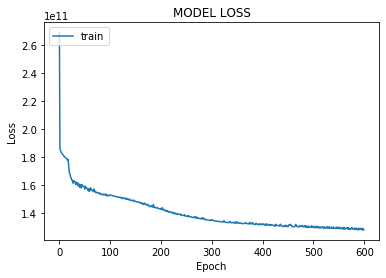

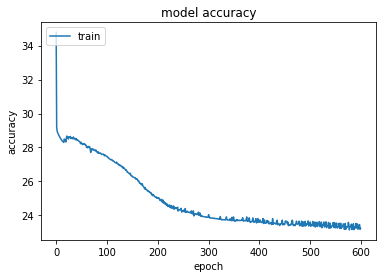

In [57]:
print(training.history.keys())
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['mean_absolute_percentage_error'])
#plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()